**********//////////HERE IN GRAPH OF DERIVED SOLUTION,THE GRAPH IS Distance vs Temparature AND TIME CONSEQUENCE HAD BEEN SHOWN WITH COLOR CHANGING\\\\\\***********


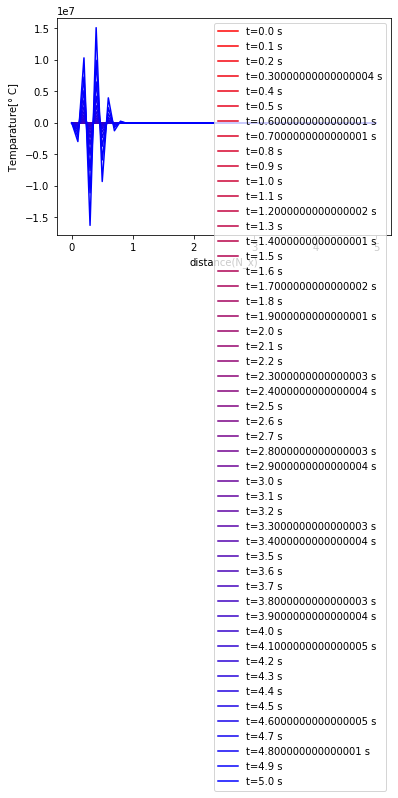

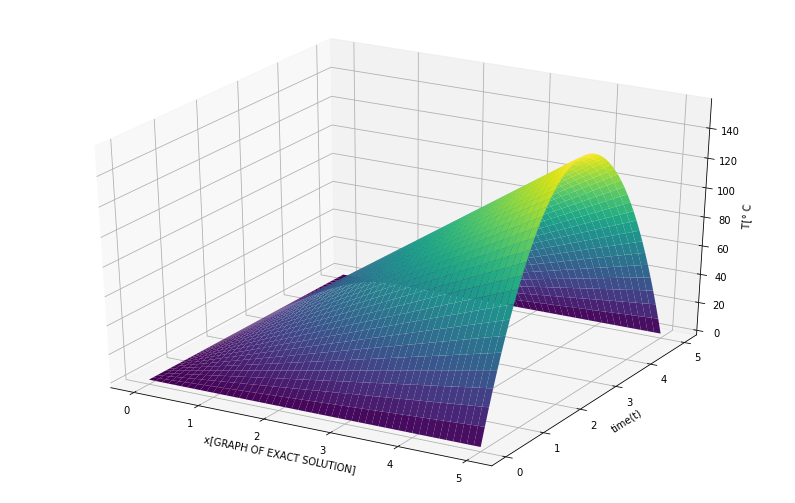

In [ ]:
#Exercise 32
#Backward Euler Scheme (Implicit Method)
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits import mplot3d
import math
def g(x, t):
  alpha=1
  l=5
  return 10*t + 5*x*(5-x)

inip=0
finp=5
delta_t= 0.1
delta_x=0.1
x=np.arange(0,5+delta_t,delta_t)
t=x
N_x= int((finp-inip)/delta_x) + 1
N_t = int(5/delta_t) + 1  # Time starting from 0 and T_fin=10
F = (delta_t/(delta_x**2))
A=np.diag([1+2*F]*(N_x-2),0)+np.diag([-F]*(N_x-3),-1)+np.diag([-F]*(N_x-3),1)
T = [[0 for _ in range(N_t)] for _ in range(N_x)]
Texact = [[0 for _ in range(N_t)] for _ in range(N_x)]
# exact solution is 5*x*t*(l-x),l=5,So initialization needed
axis_x, axis_t = [0]*N_x, [0]*N_t
#Initializing
for i in range(N_t) :
  T[0][i], T[N_x-1][i] = 0, 0
for j in range(N_x) :
  T[j][0] = 0


for i in range(1,N_t) :
  axis_t[i] = axis_t[i-1] + delta_t
for j in range(1,N_x) :
  axis_x[j] = axis_x[j-1] + delta_x

# We will plot (axis_t)
#We will plot (axis_x)


for l in range(1,N_t) :
  for m in range(1,N_x-1) :
    point_x, point_t = axis_x[m], axis_t[l]
    Texact[m][l] = 5*point_x*point_t*(5 - point_x)
    G = delta_t*g(axis_x[m+1], axis_t[l-1])
    T[m+1][l] = ((1+2*F)*T[m][l]-F*T[m-1][l]-T[m-1][l-1]-G)/F
b=T[1:-1][48].copy()
b.remove(b[0])
b.remove(b[-1])
for j in range(49):
  b[j]=T[j-1][N_t-3]+delta_t*g(axis_x[j], axis_t[N_t-2])


solution=np.linalg.solve(A,b)
R=np.linspace(1,0,N_t)
B=np.linspace(0,1,N_t)
G=0
print('**********//////////HERE IN GRAPH OF DERIVED SOLUTION,THE GRAPH IS Distance vs Temparature AND TIME CONSEQUENCE HAD BEEN SHOWN WITH COLOR CHANGING\\\\\\\\\\\***********')
for j in range(N_t):
  plt.plot(x,T[:][j],color=[R[j],G,B[j]])
plt.xlabel('distance(N_x)')
plt.ylabel('Temparature[$\degree$ C]')
plt.legend([f't={value} s'for value in t])


#EXACT SOLUTION
L, M = np.meshgrid(axis_x, axis_t)

fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection='3d')
ax.plot_surface(L, M, np.array(Texact), rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_xlabel('x[GRAPH OF EXACT SOLUTION]')
ax.set_ylabel('time(t)')
ax.set_zlabel('T[$\degree$ C');